In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# This is all with NIH data.

In [2]:
results_dir = "results"

In [3]:
os.listdir(results_dir)

['old', 'best_weights', 'vu_weights', 'nih_weights']

In [4]:
training_patterns = [os.path.join(results_dir, x) for x in os.listdir(results_dir)
                    if not os.path.isdir(x)]

In [8]:
result_files = [[os.path.join(training_pattern, x) for x in os.listdir(training_pattern) if "result" in x]
               for training_pattern in training_patterns]

result_files = result_files[1:]
result_files

[['results/best_weights/result_multisite_2018-07-23_01:48:27_val_dice_coef_0.9655_weights.csv'],
 ['results/vu_weights/result_vu_2018-07-19_10-22-02_epoch_0238_val_dice_coef_0.9656_weights.csv'],
 ['results/nih_weights/result_nih_2018-07-16_16-51-46_epoch_0222_val_dice_coef_0.9707_weights.csv']]

In [12]:
nih_results = [x[0] for x in result_files if "nih" in x[0]][0]
vu_results = [x[0] for x in result_files if "vu" in x[0]][0]
multi_results = [x[0] for x in result_files if "multi" in x[0]][0]

In [13]:
nih_df = pd.read_csv(nih_results)
vu_df = pd.read_csv(vu_results)
multi_df = pd.read_csv(multi_results)

In [14]:
nih_df = nih_df.assign(weight_site="nih")
vu_df = vu_df.assign(weight_site="vu")
multi_df = multi_df.assign(weight_site="multi")

In [16]:
merged = pd.concat([nih_df, vu_df, multi_df], keys=['nih', 'vu', 'multi'])

In [17]:
merged

filename      dice  thresholded volume(mm)  \
nih   0  1540_1a_CT.nii.gz  0.346376             9150.516703   
      1  1540_1b_CT.nii.gz  0.563401             7252.788403   
      2  1707_1b_CT.nii.gz  0.219453            16070.159834   
      3  1707_1c_CT.nii.gz  0.302846            10845.617383   
      4  1902_1a_CT.nii.gz  0.645572            15487.655411   
      5  1902_1b_CT.nii.gz  0.655558            15358.909507   
      6  1902_2b_CT.nii.gz  0.353108             6892.674229   
      7  1968_2a_CT.nii.gz  0.630001            14312.252991   
      8  5661_1b_CT.nii.gz  0.664840            58138.926338   
      9  5661_1c_CT.nii.gz  0.733919            37721.037998   
vu    0  1540_1a_CT.nii.gz  0.220419            12776.821371   
      1  1540_1b_CT.nii.gz  0.379788            10789.440565   
      2  1707_1b_CT.nii.gz  0.121545            29694.531544   
      3  1707_1c_CT.nii.gz  0.187980            17540.256078   
      4  1902_1a_CT.nii.gz  0.580687            19663.552648   
      5  1902_1b_CT.nii.gz  0.629349            17898.064835   
      6  1902_2b_CT.nii.gz  0.341914             9943.236898   
      7  1968_2a_CT.nii.gz  0.508959            21158.435644   
      8  5661_1b_CT.nii.gz  0.550269            79427.574692   
      9  5661_1c_CT.nii.gz  0.546566            52647.239701   
multi 0  1540_1a_CT.nii.gz  0.357909             6586.676926   
      1  1540_1b_CT.nii.gz  0.568425             7304.458061   
      2  1707_1b_CT.nii.gz  0.257505            12189.590064   
      3  1707_1c_CT.nii.gz  0.381092             7257.654278   
      4  1902_1a_CT.nii.gz  0.712046            15447.124293   
      5  1902_1b_CT.nii.gz  0.731235            15056.118214   
      6  1902_2b_CT.nii.gz  0.484615             6957.047181   
      7  1968_2a_CT.nii.gz  0.634443            14266.953506   
      8  5661_1b_CT.nii.gz  0.666145            55430.801205   
      9  5661_1c_CT.nii.gz  0.729799            37643.073118   

         thresholded volume ground truth(mm)  \
nih   0                          4552.556110   
      1                          8994.599791   
      2                          2139.055619   
      3                          2498.255525   
      4                         19432.284914   
      5                         19134.265845   
      6                          8008.472064   
      7                          9839.524920   
      8                         44318.810858   
      9                         30009.496821   
vu    0                          4552.556110   
      1                          8994.599791   
      2                          2139.055619   
      3                          2498.255525   
      4                         19432.284914   
      5                         19134.265845   
      6                          8008.472064   
      7                          9839.524920   
      8                         44318.810858   
      9                         30009.496821   
multi 0                          4552.556110   
      1                          8994.599791   
      2                          2139.055619   
      3                          2498.255525   
      4                         19432.284914   
      5                         19134.265845   
      6                          8008.472064   
      7                          9839.524920   
      8                         44318.810858   
      9                         30009.496821   

         largest hematoma ground truth(mm)  largest hematoma prediction(mm)  \
nih   0                        1529.626565                      1115.941281   
      1                        6869.345146                      3124.654621   
      2                        2139.055619                      1839.386035   
      3                        1931.203988                      2094.660125   
      4                       19432.284914                     11285.532156   
      5                       18831.474522                     10715.7

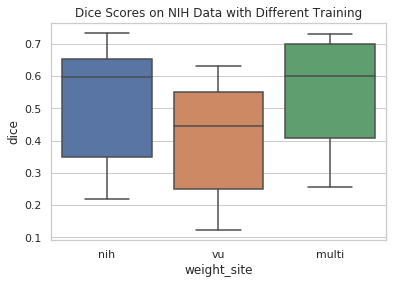

In [18]:
ax = sns.boxplot(x="weight_site", y="dice", data=merged
                ).set_title("Dice Scores on NIH Data with Different Training"
                )
fig = ax.get_figure()
fig.savefig("nih_data_boxplog.png")

In [ ]:
# This will be the best way to show the Dice scores as a box plot in the end
#ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
#                 data=tips, palette="Set3")

In [19]:
from scipy.stats import wilcoxon

In [20]:
wilcoxon(nih_df['dice'], multi_df['dice'])

WilcoxonResult(statistic=2.0, pvalue=0.009344113002204883)

In [21]:
wilcoxon(vu_df['dice'], multi_df['dice'])

WilcoxonResult(statistic=0.0, pvalue=0.005062032126267864)